In [1]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt

data = quandl.get("BSE/BOM500290", auth_token="zTyLCLUr5SCwfsntVhDC")
print(data.describe())


                Open           High           Low          Close  \
count    7140.000000    7140.000000   7140.000000    7140.000000   
mean    22073.509943   22327.611845  21795.460994   22037.746078   
std     28848.222094   29140.811072  28506.583083   28797.060384   
min        11.000000      13.750000     11.000000      13.000000   
25%      1859.000000    1884.262500   1829.925000    1853.562500   
50%      4363.500000    4469.500000   4282.525000    4345.925000   
75%     39918.425000   40292.512500  39329.650000   39839.050000   
max    100449.950000  100900.000000  99685.700000  100429.900000   

                 WAP  No. of Shares  No. of Trades  Total Turnover  \
count    7140.000000    7140.000000    7140.000000    7.140000e+03   
mean    22052.680798    2717.485154     622.066527    3.230677e+07   
std     28822.689513    7757.727813    1184.872350    5.988961e+07   
min         0.000000       0.000000       0.000000    0.000000e+00   
25%      1858.190792     350.000000  

In [2]:
null_counts = data.isnull().sum(axis=0)
print("Null Value Counts (Column-wise): ")
print(null_counts)

Null Value Counts (Column-wise): 
Open                            0
High                            0
Low                             0
Close                           0
WAP                             0
No. of Shares                   0
No. of Trades                   0
Total Turnover                  0
Deliverable Quantity         1849
% Deli. Qty to Traded Qty    1849
Spread H-L                      0
Spread C-O                      0
dtype: int64


In [3]:
zero_count = (data['No. of Shares'] == 0).sum()
print("Number of zeros in the 'No. of Shares' column:", zero_count)

data['Deliverable Quantity'].fillna(0, inplace=True)
data['% Deli. Qty to Traded Qty'].fillna(0, inplace=True)
null_counts = data.isnull().sum(axis=0)
print("Null Value Counts (Column-wise): ")
print(null_counts)

Number of zeros in the 'No. of Shares' column: 480
Null Value Counts (Column-wise): 
Open                         0
High                         0
Low                          0
Close                        0
WAP                          0
No. of Shares                0
No. of Trades                0
Total Turnover               0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread H-L                   0
Spread C-O                   0
dtype: int64


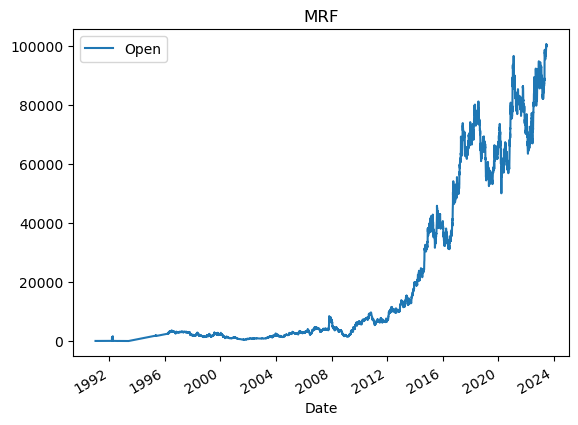

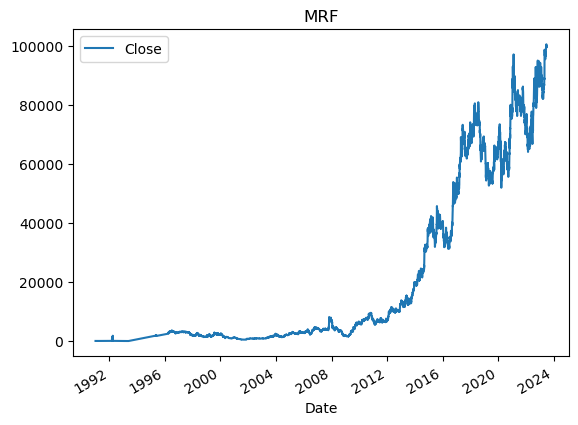

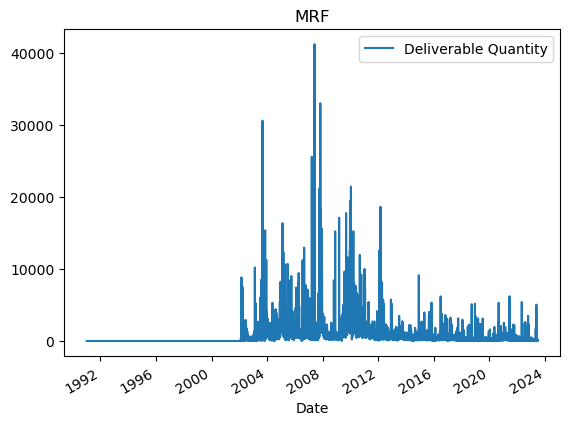

In [4]:
data[['Open']].plot()
plt.title("MRF")
plt.show()
data[['Close']].plot()
plt.title("MRF")
plt.show()
data[['Deliverable Quantity']].plot()
plt.title("MRF")
plt.show()

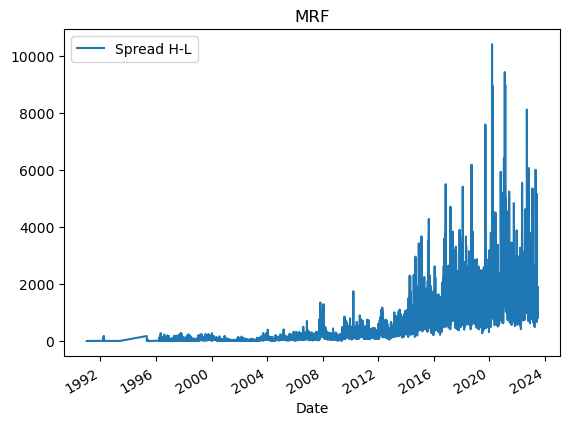

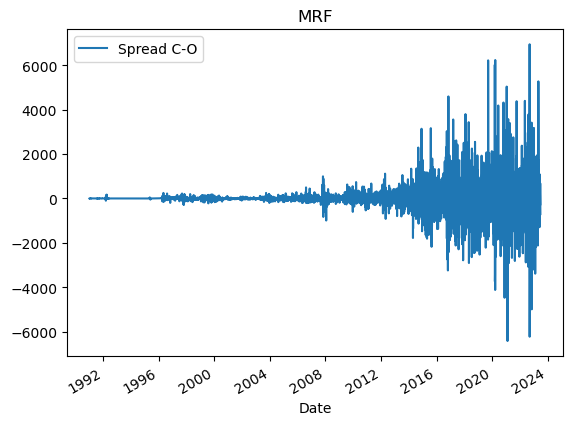

In [5]:
data[['Spread H-L']].plot()
plt.title("MRF")
plt.show()
data[['Spread C-O']].plot()
plt.title("MRF")
plt.show()

In [6]:
print(data.head(10))

             Open   High    Low  Close  WAP  No. of Shares  No. of Trades  \
Date                                                                        
1991-01-02  36.00  36.00  36.00  36.00  0.0            0.0            0.0   
1991-01-03  35.00  40.00  35.00  37.50  0.0            0.0            0.0   
1991-01-07  35.00  37.50  35.00  37.50  0.0            0.0            0.0   
1991-01-09  36.00  38.00  36.00  38.00  0.0            0.0            0.0   
1991-01-11  36.25  38.75  36.25  38.75  0.0            0.0            0.0   
1991-01-14  36.25  38.00  36.25  38.00  0.0            0.0            0.0   
1991-01-23  35.00  37.00  35.00  36.50  0.0            0.0            0.0   
1991-01-24  38.00  39.00  34.00  34.00  0.0            0.0            0.0   
1991-01-25  34.00  34.00  30.00  32.00  0.0            0.0            0.0   
1991-01-31  33.00  35.00  33.00  35.00  0.0            0.0            0.0   

            Total Turnover  Deliverable Quantity  % Deli. Qty to Traded Qty

In [7]:
print(data.columns)
data.to_csv('mrf_share_processed.csv', index=False)


Index(['Open', 'High', 'Low', 'Close', 'WAP', 'No. of Shares', 'No. of Trades',
       'Total Turnover', 'Deliverable Quantity', '% Deli. Qty to Traded Qty',
       'Spread H-L', 'Spread C-O'],
      dtype='object')


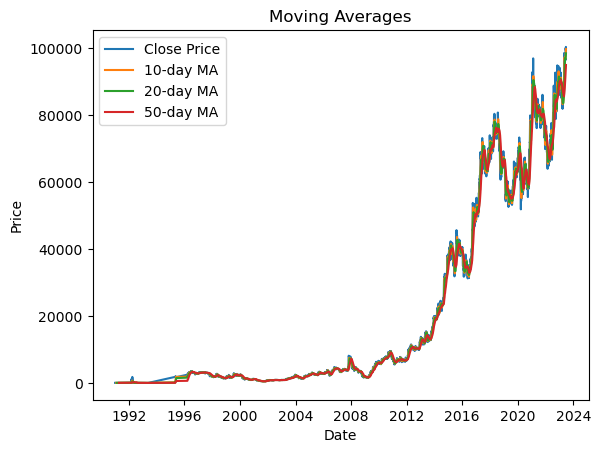

In [8]:
# Moving Averages
moving_averages = data.copy()
moving_averages['10-day Moving Average'] = moving_averages['Close'].rolling(window=10).mean()
moving_averages['20-day Moving Average'] = moving_averages['Close'].rolling(window=20).mean()
moving_averages['50-day Moving Average'] = moving_averages['Close'].rolling(window=50).mean()

# Plotting Moving Averages
plt.plot(moving_averages.index, moving_averages['Close'], label='Close Price')
plt.plot(moving_averages.index, moving_averages['10-day Moving Average'], label='10-day MA')
plt.plot(moving_averages.index, moving_averages['20-day Moving Average'], label='20-day MA')
plt.plot(moving_averages.index, moving_averages['50-day Moving Average'], label='50-day MA')

# Set the chart title and labels
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()
plt.show()

In [19]:

# Resample the dataset to weekly frequency, taking the last closing price of each week
data_resampled = data['Close'].resample('W').last()

resampled_data = pd.DataFrame(data=data_resampled, index=data_resampled.index)

resampled_data.to_csv('mrf_share_resampled.csv')